In [1]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Importing Seaborn library

import os

In [2]:
data = pd.read_csv("Regression Data Set.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CAS       779 non-null    object 
 1   SMILES    779 non-null    object 
 2   Set       779 non-null    object 
 3   nHM       779 non-null    int64  
 4   piPC09    779 non-null    float64
 5   PCD       779 non-null    float64
 6   X2Av      779 non-null    float64
 7   MLOGP     779 non-null    float64
 8   ON1V      779 non-null    float64
 9   N-072     779 non-null    int64  
 10  B02[C-N]  779 non-null    int64  
 11  F04[C-O]  779 non-null    int64  
 12  Class     779 non-null    int64  
 13  logBCF    779 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 85.3+ KB


In [4]:
data.head()

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
0,100-02-7,O=[N+](c1ccc(cc1)O)[O-],Train,0,0.0,1.49,0.14,1.35,0.72,0,1,5,1,0.74
1,100-17-4,O=[N+](c1ccc(cc1)OC)[O-],Train,0,0.0,1.47,0.14,1.70,0.88,0,1,5,1,0.93
2,100-18-5,c1cc(ccc1C(C)C)C(C)C,Train,0,0.0,1.20,0.25,4.14,2.06,0,0,0,3,3.24
3,100-25-4,O=[N+]([O-])c1ccc(cc1)[N+](=O)[O-],Train,0,0.0,1.69,0.13,1.89,0.79,0,1,8,3,-0.40
4,100-40-3,C=CC1CCC=CC1,Train,0,0.0,0.52,0.25,2.65,1.31,0,0,0,1,2.24


In [5]:
data.tail()

,CAS,SMILES,Set,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
774,99-30-9,O=[N+]([O-])c1cc(c(N)c(c1)Cl)Cl,Train,2,0.000,1.48,0.17,2.57,0.73,0,1,4,1,1.88
775,99387-89-0,FC(F)(F)c2cc(ccc2(N=C(n1cncc1)COCCC))Cl,Test,1,6.564,2.37,0.16,3.77,2.28,0,1,3,2,2.59
776,99-65-0,O=[N+]([O-])c1cccc(c1)[N+](=O)[O-],Train,0,0.000,1.71,0.13,1.89,0.79,0,1,8,1,0.77
777,99-71-8,CC(c1ccc(cc1)O)CC,Test,0,0.000,1.19,0.21,2.81,1.69,0,0,1,3,1.35
778,99-99-0,O=[N+](c1ccc(cc1)C)[O-],Test,0,0.000,1.49,0.16,2.24,0.92,0,1,4,1,0.91


In [6]:
data.describe()

,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.754814,3.467616,1.550822,0.236881,3.201746,1.510295,0.186136,0.423620,3.585366,1.736842,2.062773
std,1.985866,2.983778,0.958708,0.149319,1.595702,0.834753,0.501937,0.494449,4.430421,0.921782,1.351290
min,0.000000,0.000000,0.000000,0.090000,-1.960000,0.080000,0.000000,0.000000,0.000000,1.000000,-1.700000
25%,0.000000,0.000000,1.210000,0.170000,2.190000,0.910000,0.000000,0.000000,0.000000,1.000000,0.985000
50%,1.000000,4.263000,1.400000,0.200000,3.130000,1.270000,0.000000,0.000000,2.000000,1.000000,2.030000
75%,3.000000,6.250000,2.285000,0.240000,4.235000,2.020000,0.000000,1.000000,6.000000,3.000000,2.950000
max,12.000000,9.316000,5.900000,2.230000,8.320000,7.190000,3.000000,1.000000,25.000000,3.000000,6.060000


In [7]:
data.corr()

C:\Users\chris\AppData\Local\Temp\ipykernel_28628\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,nHM,piPC09,PCD,X2Av,MLOGP,ON1V,N-072,B02[C-N],F04[C-O],Class,logBCF
nHM,1.000000,0.111342,-0.025441,0.203271,0.409056,-0.234624,-0.066342,-0.269776,-0.132241,0.014561,0.463748
piPC09,0.111342,1.000000,0.740393,-0.272374,0.513952,0.451541,0.126526,0.050194,0.259653,0.221475,0.440484
PCD,-0.025441,0.740393,1.000000,-0.442556,0.454225,0.119992,-0.033546,0.102492,0.107124,0.128239,0.364646
X2Av,0.203271,-0.272374,-0.442556,1.000000,-0.118856,0.037763,-0.058784,-0.224941,-0.111929,-0.034267,-0.044699
MLOGP,0.409056,0.513952,0.454225,-0.118856,1.000000,0.246305,-0.203734,-0.346372,-0.098640,0.192273,0.793099
ON1V,-0.234624,0.451541,0.119992,0.037763,0.246305,1.000000,0.211816,0.147121,0.520896,0.328813,0.140240
N-072,-0.066342,0.126526,-0.033546,-0.058784,-0.203734,0.211816,1.000000,0.375869,0.176938,0.003217,-0.184886
B02[C-N],-0.269776,0.050194,0.102492,-0.224941,-0.346372,0.147121,0.375869,1.000000,0.230493,-0.107611,-0.331069
F04[C-O],-0.132241,0.259653,0.107124,-0.111929,-0.098640,0.520896,0.176938,0.230493,1.000000,0.228499,-0.130938
Class,0.014561,0.221475,0.128239,-0.034267,0.192273,0.328813,0.003217,-0.107611,0.228499,1.000000,-0.077416


C:\Users\chris\AppData\Local\Temp\ipykernel_28628\2877659397.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes)


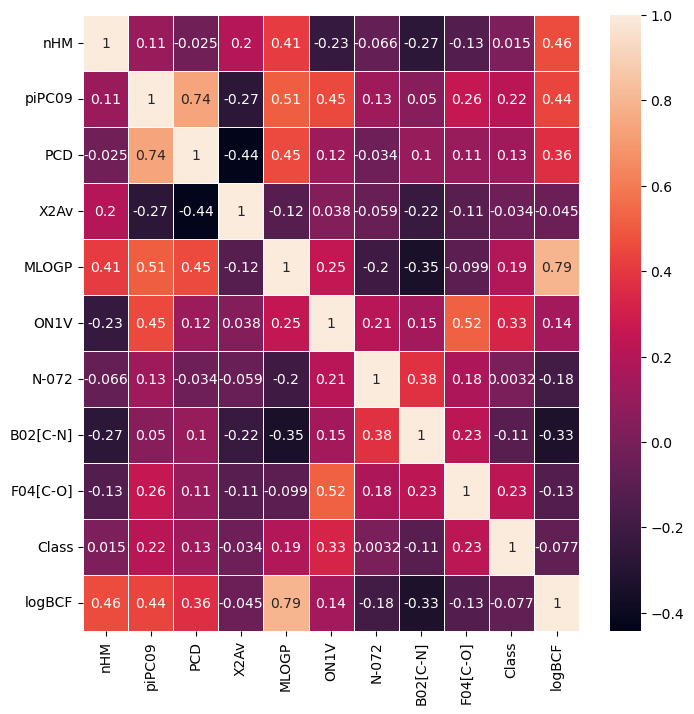

In [8]:
fig, axes = plt.subplots(figsize=(8, 8)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

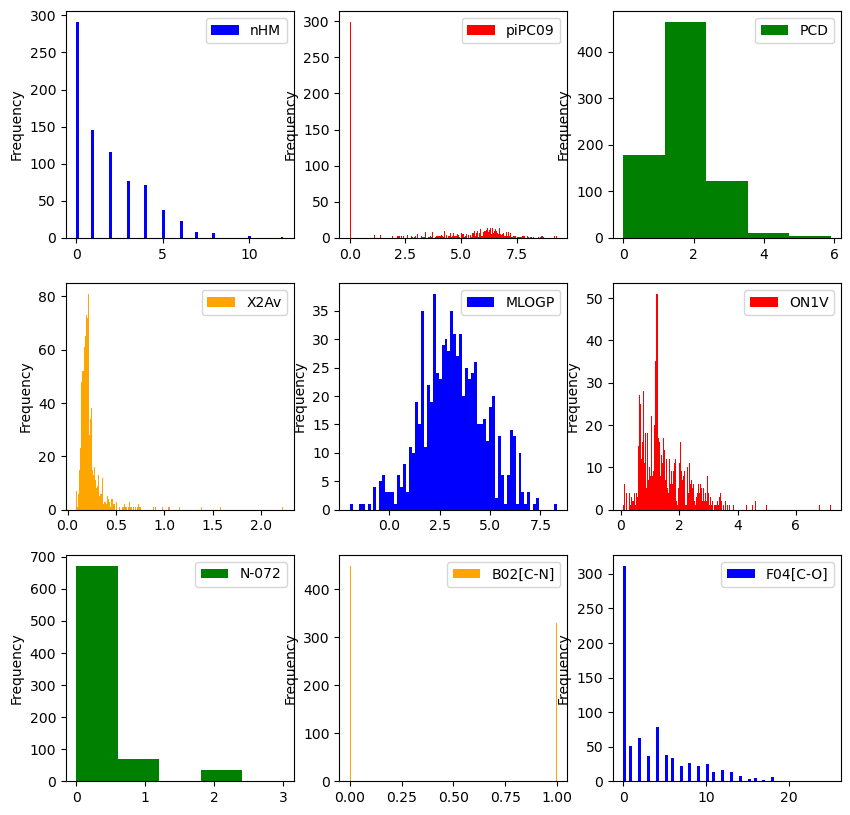

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
data.plot(kind="hist", y="nHM", bins=70, color="b", ax=axes[0][0])
data.plot(kind="hist", y="piPC09", bins=200, color="r", ax=axes[0][1])
data.plot(kind="hist", y="PCD", bins=5, color="g", ax=axes[0][2])
data.plot(kind="hist", y="X2Av", bins=200, color="orange", ax=axes[1][0])
data.plot(kind="hist", y="MLOGP", bins=70, color="b", ax=axes[1][1])
data.plot(kind="hist", y="ON1V", bins=200, color="r", ax=axes[1][2])
data.plot(kind="hist", y="N-072", bins=5, color="g", ax=axes[2][0])
data.plot(kind="hist", y="B02[C-N]", bins=200, color="orange", ax=axes[2][1])
data.plot(kind="hist", y="F04[C-O]", bins=70, color="b", ax=axes[2][2])

plt.show()

In [10]:
data.drop(["CAS", "SMILES", "Set", "Class"], axis=1, inplace=True)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nHM       779 non-null    int64  
 1   piPC09    779 non-null    float64
 2   PCD       779 non-null    float64
 3   X2Av      779 non-null    float64
 4   MLOGP     779 non-null    float64
 5   ON1V      779 non-null    float64
 6   N-072     779 non-null    int64  
 7   B02[C-N]  779 non-null    int64  
 8   F04[C-O]  779 non-null    int64  
 9   logBCF    779 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 61.0 KB


In [12]:
X = data.drop(["logBCF"], axis=1) 
y = data.logBCF.values

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [36]:
from sklearn.tree import DecisionTreeRegressor

Decision_Tree = DecisionTreeRegressor(criterion="absolute_error", random_state=55)
Decision_Tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=55)

In [37]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = Decision_Tree.predict(x_train)
y_pred_test = Decision_Tree.predict(x_test)
#y_pred_train = cross_val_predict(Decision_Tree, x_train, y_train, cv=5)
#y_pred_test = cross_val_predict(Decision_Tree, x_test, y_test, cv=5)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)


Training Accuracy for Decision Tree Regression Model:  0.998321280225137
Testing Accuracy for Decision Tree Regression Model:  0.40675511016364385
RMSE for Training Data:  0.05642933335528028
RMSE for Testing Data:  0.953040428152084


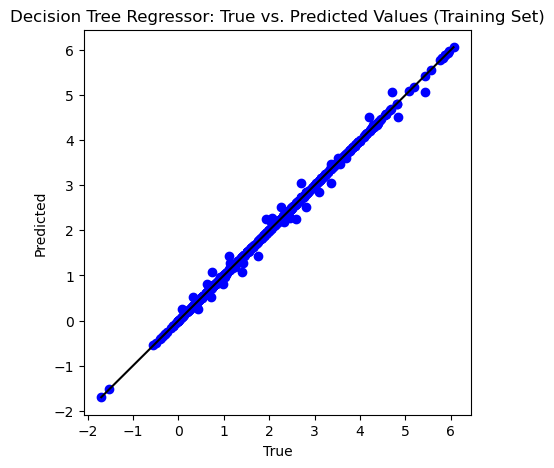

In [38]:
true_value_train = y_train
predicted_value_train = y_pred_train

plt.figure(figsize=(5,5))
p1 = max(max(predicted_value_train), max(true_value_train))
p2 = min(min(predicted_value_train), min(true_value_train))
plt.plot([p1,p2], [p1,p2], '-', c="black")
plt.scatter(true_value_train, predicted_value_train, color="blue")
plt.title("Decision Tree Regressor: True vs. Predicted Values (Training Set)")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()


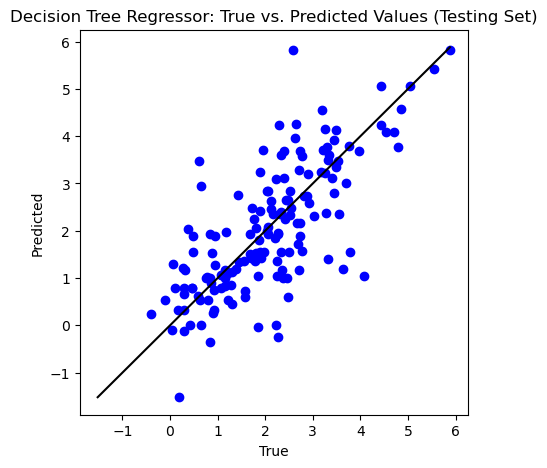

In [39]:
true_value_test = y_test
predicted_value_test = y_pred_test

plt.figure(figsize=(5,5))
p1 = max(max(predicted_value_test), max(true_value_test))
p2 = min(min(predicted_value_test), min(true_value_test))
plt.plot([p1,p2], [p1,p2], '-', c="black")
plt.scatter(true_value_test, predicted_value_test, color="blue")
plt.title("Decision Tree Regressor: True vs. Predicted Values (Testing Set)")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()
